## Learning Outcomes
- Exploratory data analysis & preparing the data for model building. 
- Machine Learning - Supervised Learning Classification
  - Logistic Regression
  - Naive bayes Classifier
  - KNN Classifier
  - Decision Tree Classifier
  - Random Forest Classifier
  - Ensemble methods
- Training and making predictions using different classification models.
- Model evaluation

## Objective: 
- The Classification goal is to predict “heart disease” in a person with regards to different factors given. 

## Context:
- Heart disease is one of the leading causes of death for people of most races in the US. At least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. 
- Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Machine learning methods may detect "patterns" from the data and can predict whether a patient is suffering from any heart disease or not..

## Dataset Information

#### Source: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?datasetId=1936563&sortBy=voteCount
Originally, the dataset come from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. 

This dataset consists of eighteen columns
- HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
- BMI: Body Mass Index (BMI)
- Smoking: smoked at least 100 cigarettes in your entire life
- AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- Stroke:Ever had a stroke?
- PhysicalHealth: physical health, which includes physical illness and injury
- MentalHealth: for how many days during the past 30 days was your mental health not good?
- DiffWalking: Do you have serious difficulty walking or climbing stairs?
- Sex: male or female?
- AgeCategory: Fourteen-level age category
- Race: Imputed race/ethnicity value
- Diabetic: diabetes?
- PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
- GenHealth: Would you say that in general your health is good, fine or excellent?
- SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
- Asthma: you had asthma?
- KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- SkinCancer: Ever had skin cancer?

### 1. Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

### 2. Load the dataset and display a sample of five rows of the data frame.

In [4]:
data = pd.read_csv('heart_data.csv')
data.sample(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
217813,No,30.34,No,No,No,0.0,0.0,No,Female,55-59,White,Yes,Yes,Excellent,7.0,No,No,No
74060,No,24.96,No,No,No,0.0,0.0,No,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
78458,No,46.77,No,No,No,21.0,0.0,Yes,Female,70-74,White,No,No,Fair,7.0,Yes,No,No
120449,No,21.87,Yes,No,No,0.0,7.0,No,Male,25-29,White,No,Yes,Very good,8.0,No,No,No
274273,Yes,25.73,No,No,No,0.0,0.0,No,Male,50-54,White,No,Yes,Excellent,6.0,No,No,No


### 3. Check the shape of the data (number of rows and columns). Check the general information about the dataframe using the .info() method.

In [5]:
data.shape

(319795, 18)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

### 4. Check the statistical summary of the dataset and write your inferences.

In [7]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


- The Min and Max Values of "BMI" are 12.02 and 94.85 with an average value of 28.32
- The Min and Max Values of "Physical Health" are 0 and 30 with an average value of 3.37.
- The Min and Max Values of "Mental Health" is 0 and 30 with an average value of 3.89.
- The Min and Max Values of "Sleep Time" is 1 and 24 with an average value of 7.09.


In the given data we can infer that the Minimum BMI value is 12.02, which is considered underweight. The Maximum BMI value is 94.85, which is well into the obese range. The average BMI value of 28.32 falls within the overweight range.

The data for Measure of Physical Health with an average value of 3.37 suggests that on average, people reported nearly 3-4 days in the past month where they experienced physical illness or injury.

The data for Mental Health with an average value of 3.89 suggests that on average, people reported nearly 4 days in the past month where they felt their mental health was not good.

The data for Sleep Time with an average value of 7.09 suggests that on average, people are getting just over 7 hours of sleep per day.


In [8]:
data.describe(include='O').T

,count,unique,top,freq
HeartDisease,319795,2,No,292422
Smoking,319795,2,No,187887
AlcoholDrinking,319795,2,No,298018
Stroke,319795,2,No,307726
DiffWalking,319795,2,No,275385
Sex,319795,2,Female,167805
AgeCategory,319795,13,65-69,34151
Race,319795,6,White,245212
Diabetic,319795,4,No,269653
PhysicalActivity,319795,2,Yes,247957


- **HeartDisease:** Out of 319,795 respondents, the majority (292,422) have not reported having coronary heart disease (CHD) or myocardial infarction (MI).

- **Smoking:** Most respondents (187,887) have not smoked at least 100 cigarettes in their entire life.

- **AlcoholDrinking:** A large number of respondents (298,018) are not heavy drinkers.

- **Stroke:** Most respondents (307,726) have not had a stroke.

- **DiffWalking:** The majority of respondents (275,385) do not have serious difficulty walking or climbing stairs.

- **Sex:** The dataset is almost evenly split between males and females, with slightly more females (167,805).

- **AgeCategory:** The age group with the most respondents is 65-69 years old (34,151).

- **Race:** The majority of respondents (245,212) are White.

- **Diabetic:** Most respondents (269,653) do not have diabetes.

- **PhysicalActivity:** Most respondents (247,957) reported doing physical activity or exercise during the past 30 days other than their regular job.

- **GenHealth:** The majority of respondents (113,858) rate their general health as “Very good”.

- **Asthma:** Most respondents (276,923) do not have asthma.

- **KidneyDisease:** The majority of respondents (308,016) have not been told they had kidney disease.

- **SkinCancer:** Most respondents (289,976) have not had skin cancer.

### 5. Check the percentage of missing values in each column of the data frame. Drop the missing values if there are any.

In [9]:
df = data.copy()
df.isnull().sum()/len(df)*100

HeartDisease        0.0
BMI                 0.0
Smoking             0.0
AlcoholDrinking     0.0
Stroke              0.0
PhysicalHealth      0.0
MentalHealth        0.0
DiffWalking         0.0
Sex                 0.0
AgeCategory         0.0
Race                0.0
Diabetic            0.0
PhysicalActivity    0.0
GenHealth           0.0
SleepTime           0.0
Asthma              0.0
KidneyDisease       0.0
SkinCancer          0.0
dtype: float64

- There are No Missing Values in the Dataset.

### 6. Check if there are any duplicate rows. If any drop them and check the shape of the dataframe after dropping duplicates.

In [10]:
len(df[df.duplicated()])

18078

In [11]:
df.drop_duplicates(inplace=True)
len(df[df.duplicated()])

0

In [12]:
print('Previous Shape = ', data.shape)
print('Corrected Shape = ',df.shape)
print('Duplicated Rows Droped = ', (data.shape[0] - df.shape[0]))

Previous Shape =  (319795, 18)
Corrected Shape =  (301717, 18)
Duplicated Rows Droped =  18078


### 7. Check the distribution of the target variable (i.e. 'HeartDisease') and write your observations.

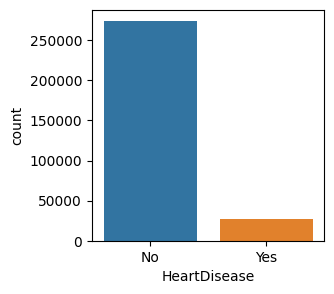

In [13]:
plt.figure(figsize=(3,3))
sns.countplot(x ='HeartDisease', data = df)
plt.show()

- HeartDisease: Out of 319,795 respondents, the majority (292,422) have not reported having coronary heart disease (CHD) or myocardial infarction (MI) and (27,373) have reported having coronary heart disease (CHD) or myocardial infarction (MI).

- Based on the information, it appears that the target variable “Heart Disease” suggests that the dataset is imbalanced, meaning that one class (patients without heart disease) is significantly more frequent than the other class (patients with heart disease).

### 8. Visualize the distribution of the target column 'Heart disease' with respect to various categorical features and write your observations.

In [14]:
cols = (df.dtypes == 'object')
object_cols = list(cols[cols].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']


In [15]:
categorical_features = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 
                      'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 
                      'Asthma', 'KidneyDisease', 'SkinCancer']

crosstabs = []
for feature in categorical_features:
    crosstab = pd.crosstab(data[feature], data['HeartDisease'])
    crosstab['Feature'] = feature
    crosstabs.append(crosstab)

result = pd.concat(crosstabs)
result

HeartDisease,No,Yes,Feature
No,292422,0,HeartDisease
Yes,0,27373,HeartDisease
No,176551,11336,Smoking
Yes,115871,16037,Smoking
No,271786,26232,AlcoholDrinking
Yes,20636,1141,AlcoholDrinking
No,284742,22984,Stroke
Yes,7680,4389,Stroke
No,258040,17345,DiffWalking
Yes,34382,10028,DiffWalking


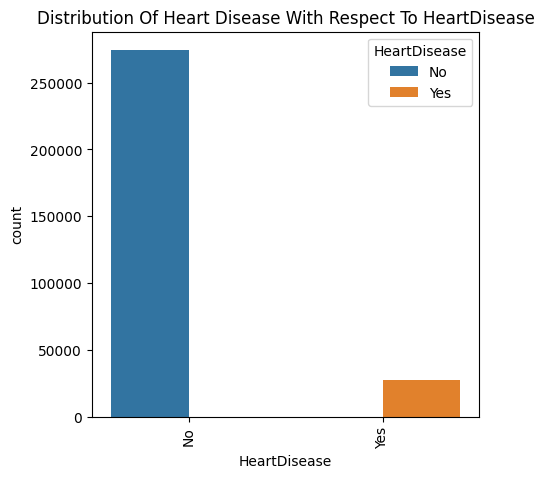

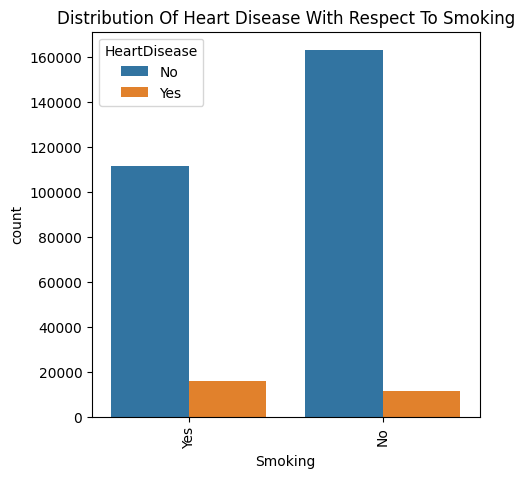

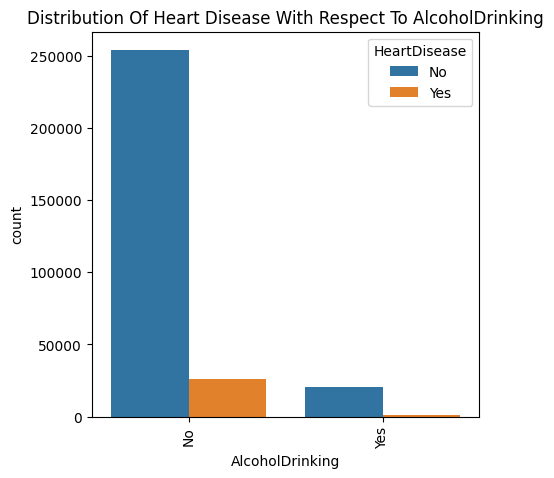

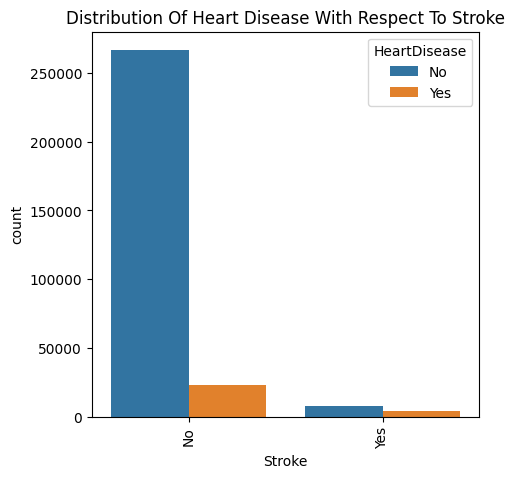

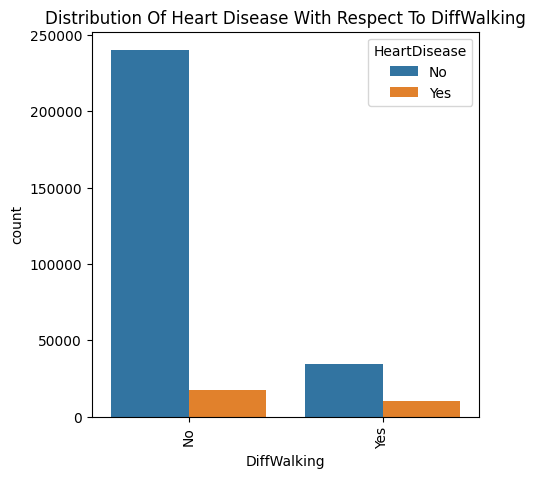

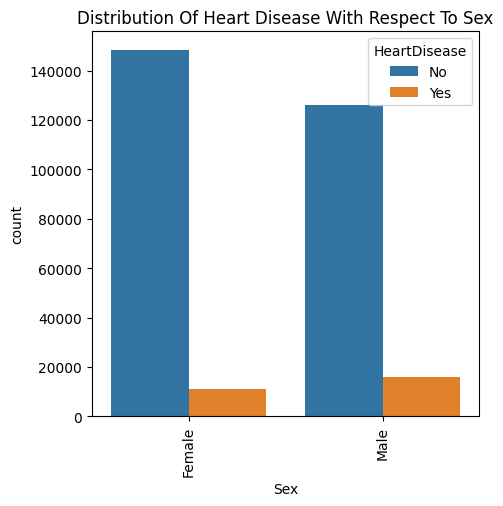

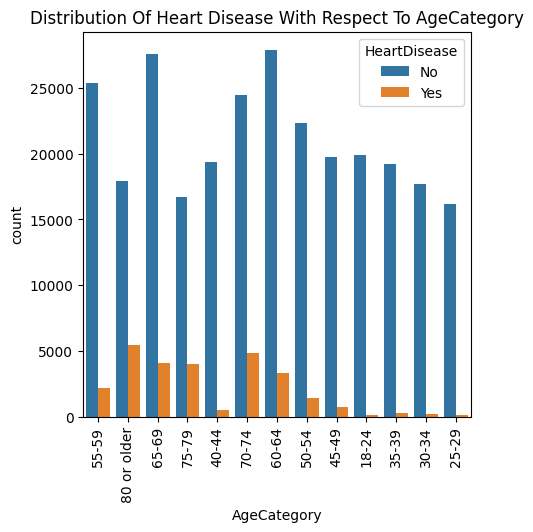

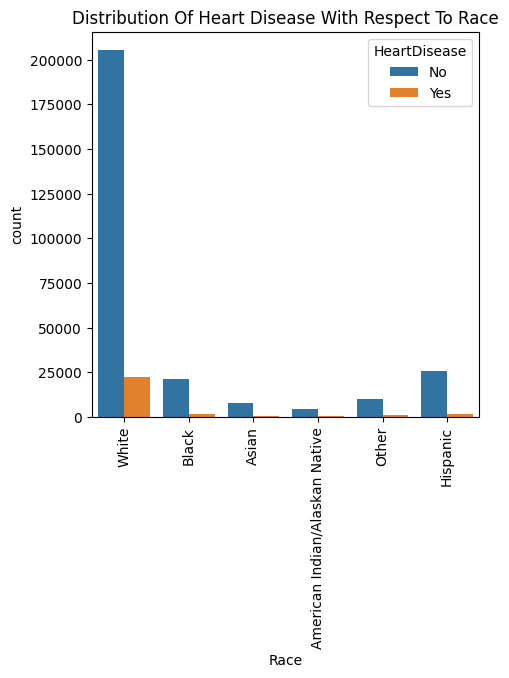

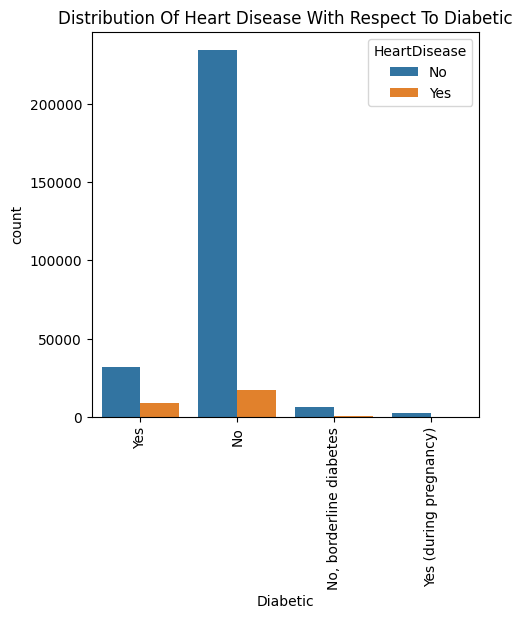

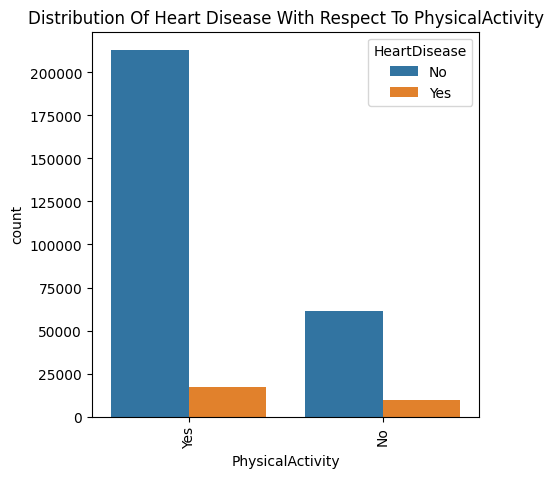

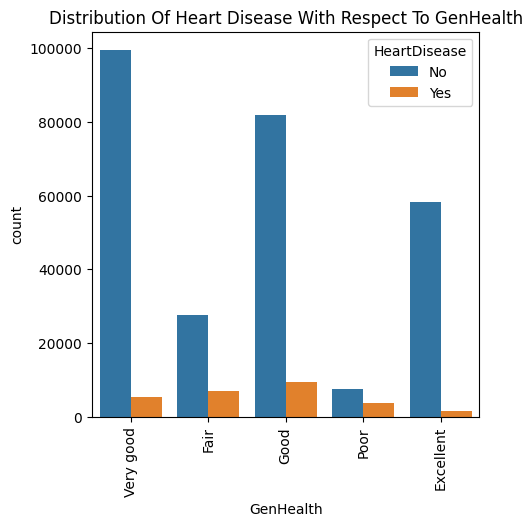

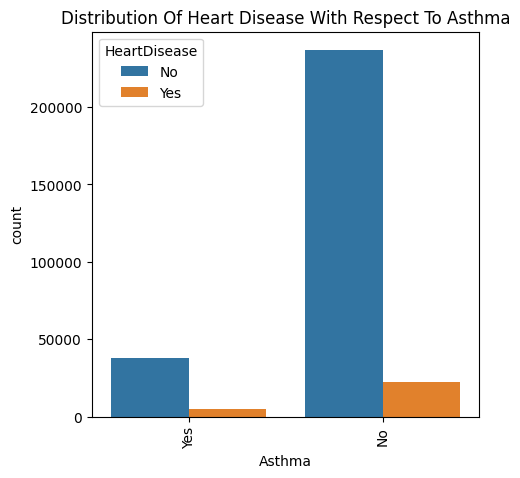

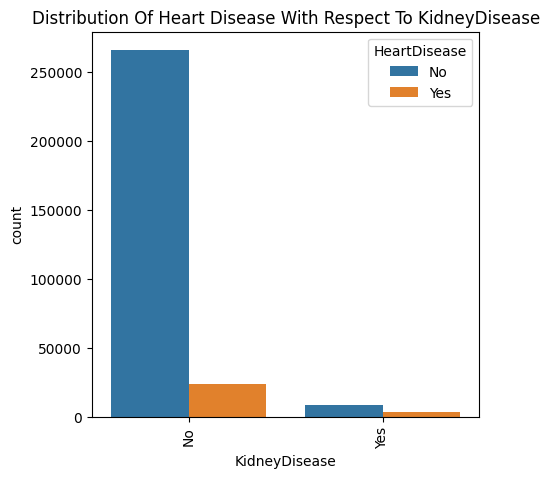

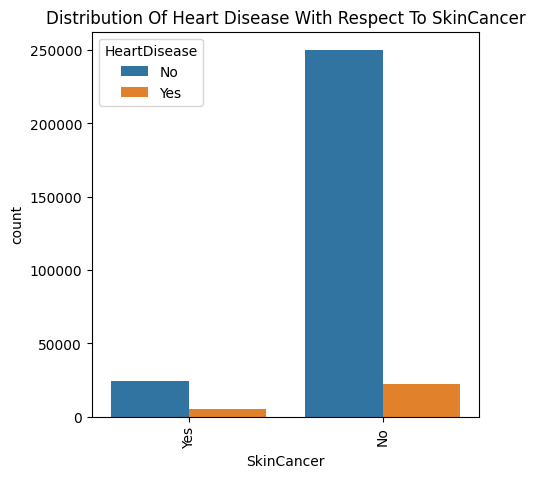

In [16]:
for feature in categorical_features:
    plt.figure(figsize=(5,5))
    sns.countplot(x=feature, hue='HeartDisease', data=df)
    plt.title(f'Distribution Of Heart Disease With Respect To {feature}')
    plt.xticks(rotation=90)
    plt.show()

Based on the above observations, we can infer the following -

- There is a higher proportion of patients with heart disease among smokers than among non-smokers. 

- There is a higher proportion of patients with heart disease among males than among females. 

- The proportion of patients with heart disease increases with age. 

- White patients have the highest number of heart disease cases (22,507), followed by Black (1,729), Hispanic (1,443), Other (886), American Indian/Alaskan Native (542), and Asian (266) patients.

### 9. Check the unique categories in the column 'Diabetic'. Replace 'Yes (during pregnancy)' as 'Yes' and 'No, borderline diabetes' as 'No'.

In [17]:
df['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [18]:
df['Diabetic'].nunique()

4

In [19]:
df['Diabetic'] = df['Diabetic'].replace({'Yes (during pregnancy)': 'Yes', 'No, borderline diabetes': 'No'})
df['Diabetic'].unique()

array(['Yes', 'No'], dtype=object)

In [20]:
df['Diabetic'].value_counts()

Diabetic
No     258572
Yes     43145
Name: count, dtype: int64

### 10. For the target column 'HeartDiease', Replace 'No' as 0 and 'Yes' as 1. 

In [21]:
df['HeartDisease'].unique()

array(['No', 'Yes'], dtype=object)

In [22]:
df['HeartDisease'] = df['HeartDisease'].replace({'No':0 , 'Yes':1})
df['HeartDisease'].unique()

array([0, 1], dtype=int64)

In [23]:
df['HeartDisease'].value_counts()

HeartDisease
0    274456
1     27261
Name: count, dtype: int64

### 11. Label Encode the columns "AgeCategory", "Race", and "GenHealth". Encode the rest of the columns using dummy encoding approach.

In [24]:
labelEncoder = LabelEncoder()

for col in ['AgeCategory', 'Race', 'GenHealth']:
    df[col] = labelEncoder.fit_transform(df[col])

dummy_cols = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 
              'Sex', 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']
df = pd.get_dummies(df, columns=dummy_cols, drop_first=True, dtype=int)

df.head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,HeartDisease_1,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,16.60,3.0,30.0,7,5,4,5.0,0,1,0,0,0,0,1,1,1,0,1
1,20.34,0.0,0.0,12,5,4,7.0,0,0,0,1,0,0,0,1,0,0,0
2,26.58,20.0,30.0,9,5,1,8.0,0,1,0,0,0,1,1,1,1,0,0
3,24.21,0.0,0.0,11,5,2,6.0,0,0,0,0,0,0,0,0,0,0,1
4,23.71,28.0,0.0,4,5,4,8.0,0,0,0,0,1,0,0,1,0,0,0


### 12. Store the target column (i.e.'HeartDisease') in the y variable and the rest of the columns in the X variable.

In [25]:
y = df['HeartDisease_1']
X = df.drop('HeartDisease_1', axis=1)

print(X.columns)

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'Race',
       'GenHealth', 'SleepTime', 'Smoking_Yes', 'AlcoholDrinking_Yes',
       'Stroke_Yes', 'DiffWalking_Yes', 'Sex_Male', 'Diabetic_Yes',
       'PhysicalActivity_Yes', 'Asthma_Yes', 'KidneyDisease_Yes',
       'SkinCancer_Yes'],
      dtype='object')


### 13. Split the dataset into two parts (i.e. 70% train and 30% test) and print the shape of the train and test data

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (211201, 17)
y_train shape: (211201,)
X_test shape: (90516, 17)
y_test shape: (90516,)


### 14. Standardize the numerical columns using Standard Scalar approach for both train and test data.

In [27]:
numerical_cols = data.select_dtypes(include=['int', 'float']).columns
print(numerical_cols)

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], dtype='object')


In [28]:
scaler = StandardScaler()

X_train[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']] = scaler.fit_transform(X_train[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']])
X_test[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']] = scaler.transform(X_test[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']])

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (211201, 17)
X_test shape: (90516, 17)


In [29]:
X_train.head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
176022,-1.132899,-0.439473,-0.384657,5,5,0,0.625112,1,0,0,0,0,0,1,0,0,0
209180,0.039479,-0.439473,-0.507567,11,5,2,-0.737100,0,0,0,0,1,1,1,0,0,0
167240,0.039479,-0.439473,-0.507567,9,5,0,0.625112,0,0,0,0,0,1,1,0,0,0
8444,-0.413099,-0.439473,0.106980,9,5,4,0.625112,1,0,0,0,1,0,1,0,1,1
130663,-0.105716,-0.316708,-0.507567,7,4,4,-0.055994,1,0,0,0,1,1,1,0,0,0


In [30]:
X_test.head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
284798,1.103733,-0.439473,-0.261748,9,2,4,0.625112,0,0,0,1,0,0,1,0,0,0
206219,-0.099538,-0.439473,-0.507567,11,2,2,0.625112,0,0,0,0,1,1,1,1,0,0
298442,-0.410010,-0.193943,-0.261748,6,5,4,0.625112,0,0,0,0,0,0,1,0,0,0
119751,1.548588,-0.316708,-0.384657,6,2,2,1.987323,1,0,1,0,0,1,1,0,0,0
103309,-0.173680,-0.439473,-0.261748,4,2,4,0.625112,0,0,0,0,0,0,1,0,0,0


### 15. Write a function.
- i) Which can take the model and data as inputs.
- ii) Fits the model with the train data.
- iii) Makes predictions on the test set.
- iv) Returns the Accuracy Score.

In [31]:
def fit_and_predict(model, X_train, X_test, y_train, y_test):
    # Fit model with the training data
    model.fit(X_train, y_train)
    
    # Predictions on the test set
    predictions = model.predict(X_test)
    
    # Calculate and Return the Accuracy Score
    accuracy = accuracy_score(y_test, predictions)
    return accuracy

### 16. Use the function and train a Logistic regression, KNN, Naive Bayes, Decision tree, Random Forest, Adaboost, GradientBoost, and Stacked Classifier models and make predictions on test data and evaluate the models, compare and write your conclusions and steps to be taken in future in order to improve the accuracy of the model.

In [32]:
lr = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
adb = AdaBoostClassifier()
gb = GradientBoostingClassifier()

# Defining the base estimators for the Stacking Classifier
estimators = [('rf', rf),('knn', knn), ('gb', gb), ('adb', adb)]
sc = StackingClassifier(estimators=estimators, final_estimator=rf)

# Listing of models and their names
models = [lr, nb, knn, dt, rf, adb, gb, sc]
names = ['Logistic Regression','Naive Bayes','KNN','Decision tree', 'Random Forest', 'Ada Boost', 'Gradient Boost', 'Stacking']

# Training each model and printing their accuracy
for model, name in zip(models, names):
    accuracy = fit_and_predict(model, X_train, X_test, y_train, y_test)
    print(f'{name} Accuracy: {accuracy}')

Logistic Regression Accuracy: 0.9099385743956869
Naive Bayes Accuracy: 0.8408679128551858
KNN Accuracy: 0.9015201732290424
Decision tree Accuracy: 0.8545340050377834
Random Forest Accuracy: 0.8992553802642627
Ada Boost Accuracy: 0.9108555393521587
Gradient Boost Accuracy: 0.9116620266030315
Stacking Accuracy: 0.9057735648946043


### Conclusion

- From the results, it seems that the Gradient Boost Algorithm has the highest Accuracy of 0.911, followed closely by the Ada Boost Algorithm with an Accuracy of 0.910. 
- The Naive Bayes algorithm has the lowest Accuracy of 0.840.

- These results suggest that ensemble methods such as Gradient Boost [0.911], Ada Boost [0.910], and Stacking [0.905] generally perform better than single models such as Logistic Regression [0.909], Naive Bayes [0.840], KNN [0.901], and Decision Tree [0.854] on this particular dataset. This can be because ensemble methods combine the predictions of multiple models to improve the overall performance.

- We can also note that the difference in accuracy between the best performing model (Gradient Boost) and the worst performing model (Naive Bayes) is relatively small, at around 7%. This suggests that all of the models are able to capture some of the underlying patterns in the dataset, and some models are better at it than others.

----
## Happy Learning:)
----